<font color="maroon" size="6"><center><b>Hierarchical Clustering</b></center></font>
<font color="Royalblue" size="4"><center>Owner: Sushant Borade</center></font>
<font color="Royalblue" size="4"><center>Mail ID: sushant.9196@gmail.com</center></font>

<font size="4"><b>Loading the Package</b></font>

In [20]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing
from sklearn.preprocessing import StandardScaler

#model
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

<font size="4" color="green"><b>User Defined Function</b></font>

In [2]:
def scatter_regplot(x, y, in_data): 
    '''
    Returns Scatter plot with regression trend line
    '''
    
    sns.regplot(x=x, y=y, data=in_data) 
    plt.xlabel(x, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + x + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

In [3]:
def HeatMap(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 7))        # Sample figsize in inches
    sns.heatmap(corr,annot=True ,linewidths=.10,ax=ax,cmap='YlGnBu',mask=mask, vmin = -1,vmax=1,)
    bottom, top = ax.get_ylim()
    #print("Bottom is ",bottom,"After adding",bottom+0.5)
    #print("TOp is ",top,"After adding",top-0.5)
    ax.set_ylim(bottom + 0.5, top - 0.5)

<font size="4" color="green"><b>Loading the Data Set</b></font>

In [4]:
filepath = r"F:\github"
filename = "Customers.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [5]:
data.head() #Top 5 rows

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [6]:
data.tail() #Bottom 5 rows

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18
199,200,30,137,83


<font size="4" color="red"><b>Data Cleaning</b></font>

In [7]:
data.shape #Find no or rows and columns

(200, 4)

In [8]:
data.columns #To get column Names

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [9]:
data['CustomerID'].nunique(),data.shape[0]

(200, 200)

<font size="3">We Can see that unique value in "CustomerID" column is same as that of no of rows, thus "CustomerID" column can just be consider as a row identifier So we can drop that column</font>

<Font color="Red" size="4"><b>Remove Unwanted Columns</b></Font>

In [10]:
data = data.drop(["CustomerID"], axis = 1)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<font size="4" color="red"><b>Check For missing values</b></font>

In [11]:
data.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<font size="4" color="green"><b>Lucky !! No missing data :)</b></font>

<font size="4" color="red"><b>Univarate Analysis</b></font>

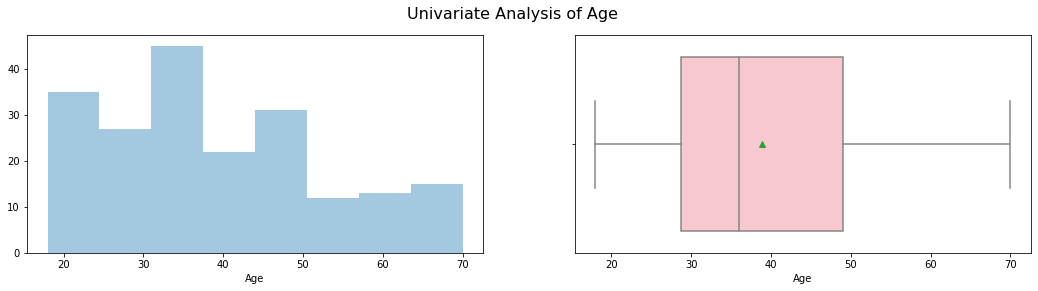

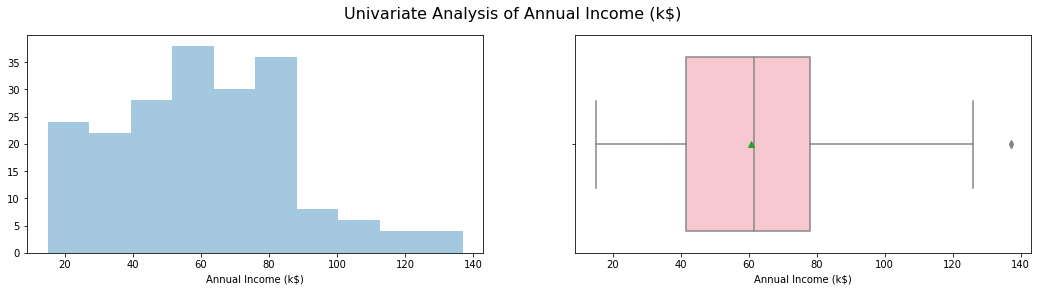

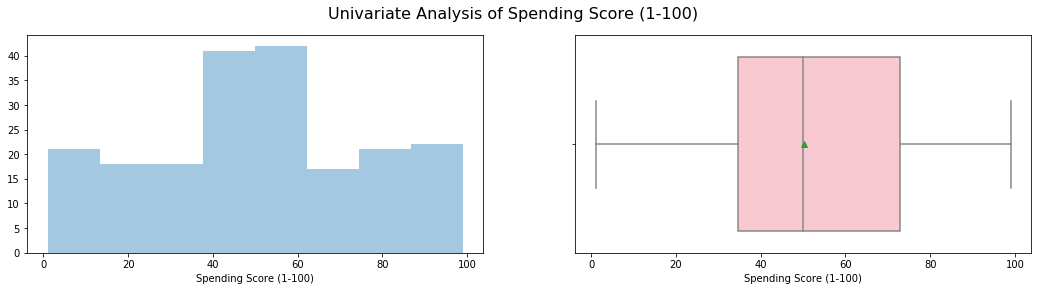

In [12]:
x_axis = ["Age", "Annual Income (k$)","Spending Score (1-100)"]
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(data[x], ax=axes[0], kde = False)
    sns.boxplot(data[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

<font size="4" color="red"><b>Bi-Variate Analysis</b></font>

<font size="4"><b>scatter plot between input feature</b></font>

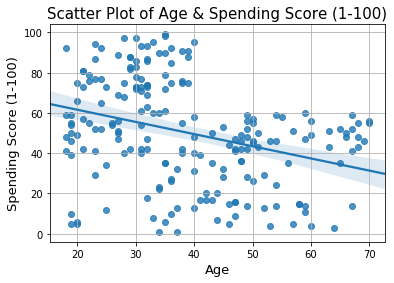

In [13]:
scatter_regplot('Age','Spending Score (1-100)',data)

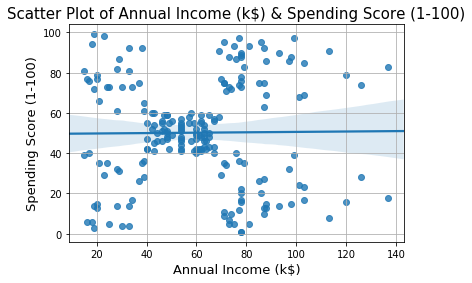

In [14]:
scatter_regplot('Annual Income (k$)','Spending Score (1-100)',data)

<font color="blue" size="4"><b>Correlation Using Heatmap</b></font>

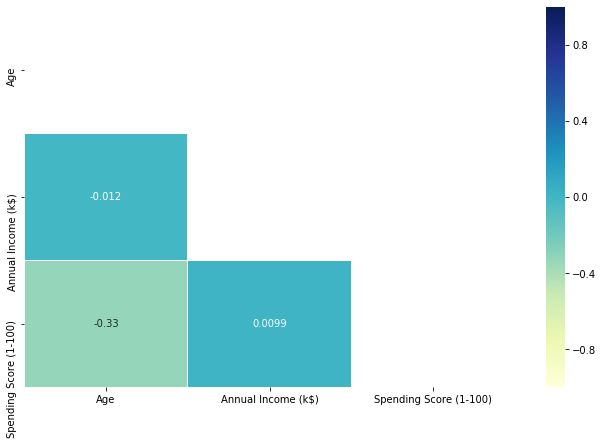

In [15]:
HeatMap(data)

<font size="4" color="green"><b>We can see that there is no correlation between input feature thus there is no multicollinearity and we can use all numerical feature in the model</b></font>

<font size="6" color="maroon"><b><center><u>Hierarchical Clustering - Agglomerative</u></center></b></font>

In [18]:
X = ["Age","Annual Income (k$)", 'Spending Score (1-100)'] 

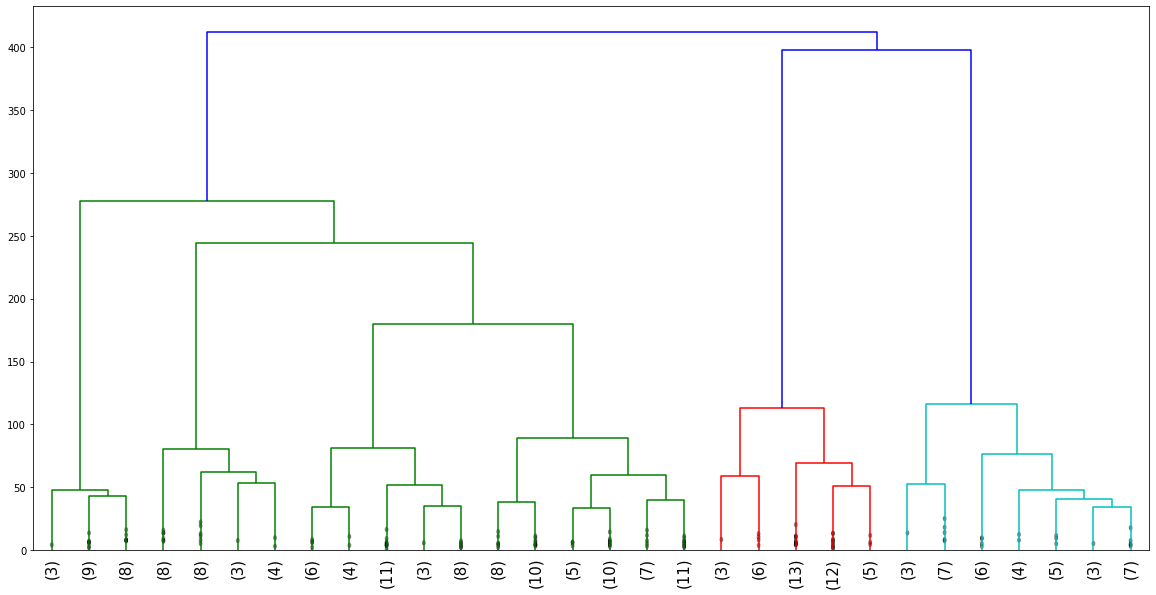

In [19]:
Z2 = linkage(data[X], 'ward')
plt.figure(figsize=(20,10))
dendrogram(Z2, p=30, leaf_rotation=90., leaf_font_size=15, show_contracted=True,
                   truncate_mode='lastp') 
#plt.axhline(75)
plt.show()


In [21]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
data["Hier Labels"] = cluster.fit_predict(data[X])

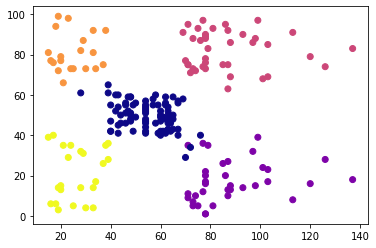

In [22]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c= data["Hier Labels"], cmap='plasma') 
plt.show()

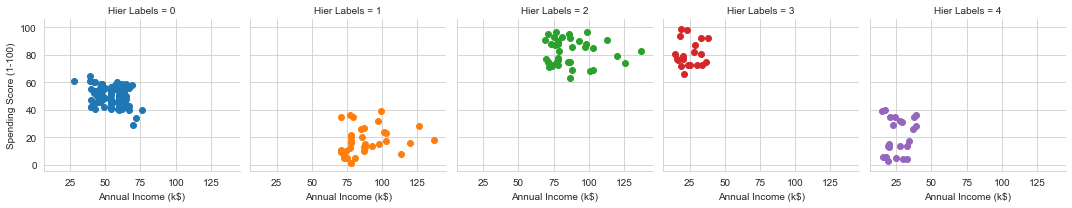

In [24]:
sns.set_style("whitegrid")
g = sns.FacetGrid(data, col="Hier Labels", hue = "Hier Labels")
g = g.map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)")  #edgecolor="w"
plt.rcParams["axes.labelsize"] = 15

<font size="4" color="blue"><b>Cluster 1: Normal Income - Normal Spending Score - Standard</b></font>

<font size="4" color="orange"><b>Cluster 4: High Income - Low Spending Score - Carefull</b></font>

<font size="4" color="green"><b>Cluster 3: High Income - High Spending Score - Target</b></font>

<font size="4" color="maroon"><b>Cluster 3: Low Income - High Spending Score - Careless</b></font>

<font size="4" color="purple"><b>Cluster 4: High Income - Low Spending Score - Carefull</b></font>

In [25]:
data["Hier Labels"].value_counts()


0    83
2    39
1    35
4    23
3    20
Name: Hier Labels, dtype: int64

<font size="4" color="green"><b>Conclusing Statement</b></font>
    
    Thus Using K-Means Clustering I have cluster the data into 5 Cluster Out of which data in Cluster 1 is highest i.e 
    Normal Income - Normal Spending Score and Least in Low income and High spending score